# TD2 – INTELLIGENCE ARTIFICIELLE ET OPTIMISATION - GAN
## Compréhension et expérimentation avec GAN Lab et StyleGAN3

**Auteurs:** Sana TABBOU - Malak OUJDID 

## 1. Introduction

Ce TD vise à comprendre le fonctionnement des GAN (Generative Adversarial Networks) en utilisant deux ressources principales :

GAN Lab : une interface interactive pour visualiser l’apprentissage d’un GAN.

StyleGAN3 : un modèle avancé de génération d’images haute résolution.

Nous allons explorer les hyperparamètres de GAN Lab, puis instancier StyleGAN3 pour générer des images.



## 2. GAN Lab
### 2.1 Compréhension du modèle

GAN Lab permet d’explorer visuellement le fonctionnement d’un Generative Adversarial Network (GAN) composé de :

    G = Générateur : apprend à produire des exemples artificiels.

    D = Discriminateur : apprend à distinguer vrai/faux.

    Entraînement basé sur un jeu à somme nulle :

       D minimise la classification incorrecte.

       G maximise les erreurs de D.

    Principes importants visibles dans GanLab :

        Le bruit latent (Z) est projeté vers l’espace réel.

        Les frontières de décision du discriminant évoluent pendant l'entraînement.

        La distribution générée se rapproche progressivement des données réelles.

### 2.2 Test de différents hyperparamètres



## 2.2.1. Learning Rate (Taux d'apprentissage)

TEST 1 : Learning Rate = 0.001**

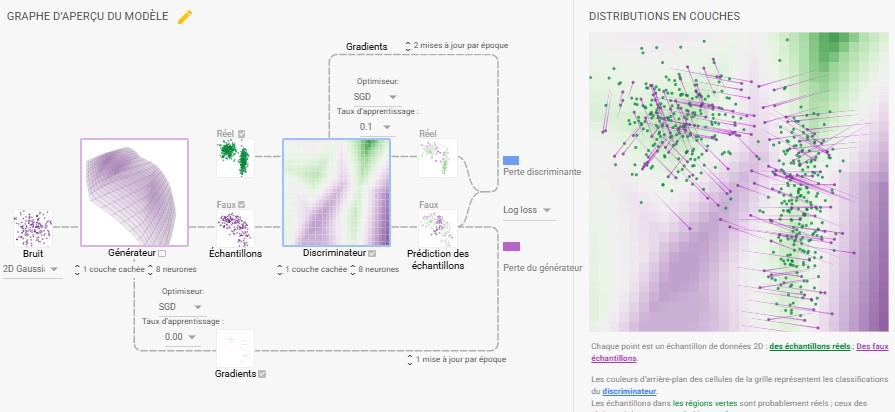

**Observations :**

Le générateur bouge très vite dans l’espace latent → les vecteurs de gradient violets sont longs et parfois incohérents.

Le discriminant montre de fortes zones violettes et vertes, ce qui indique un conflit important entre G et D.

On observe une forte instabilité, avec des zones entières où le générateur “pousse” ses points dans de mauvaises directions.

**Commentaire :**

Un LR de 0.1 est trop élevé :

-Le générateur sur-réagit aux corrections du discriminant, ce qui provoque des oscillations.

-Le GAN n’arrive pas à se stabiliser.


**TEST 2 : Learning Rate = 0.01** 

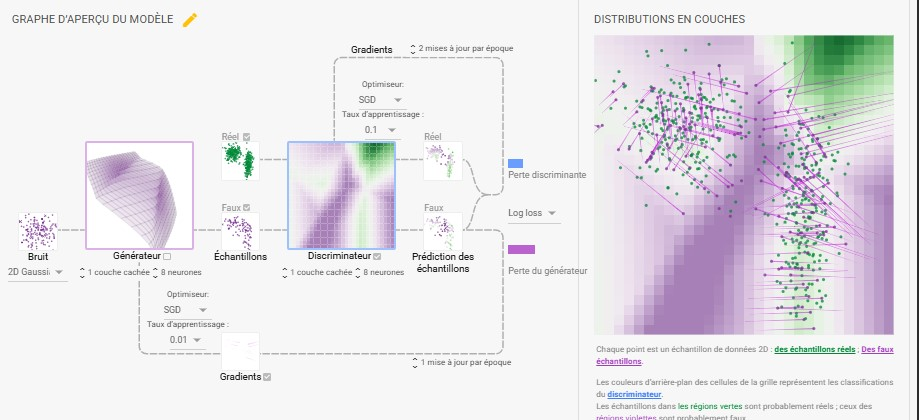

**Observations :**
es vecteurs de déplacement des échantillons générés sont plus courts et mieux orientés.

La surface de décision du discriminateur (fond vert / violet) est moins chaotique.

Les faux échantillons (violets) commencent à se rapprocher de la distribution réelle (verte).

**Commentaire :**

Avec un LR de 0.01, l’apprentissage devient nettement plus stable :

-Le générateur apprend encore rapidement, mais sans perdre complètement le contrôle.

-Le GAN commence à converger vers un équilibre G/D satisfaisant.


**TEST 3 : Learning Rate = 0.1** 

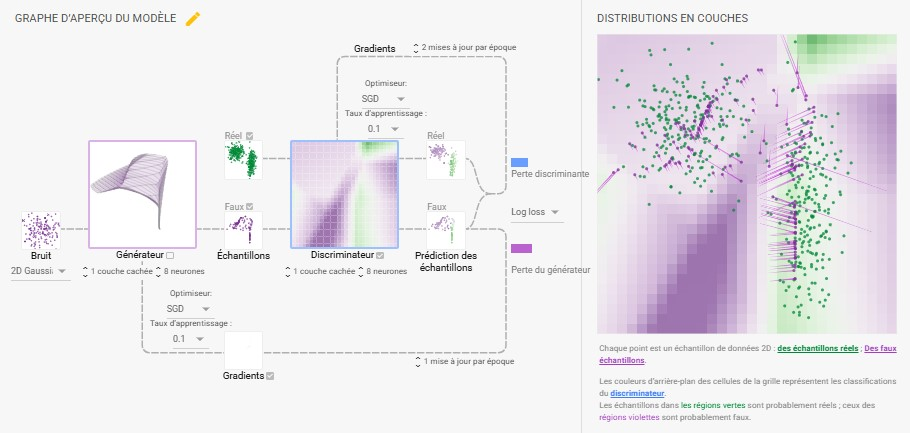

**Observations :**

Les vecteurs violets deviennent très petits, presque immobiles.

Les faux échantillons restent éloignés des vrais, le générateur n’arrive pas à “rattraper” le discriminant.

Le discriminant domine rapidement → il classifie presque tout correctement sans difficulté.

**Commentaire :**

Un LR de 0.001 est trop faible :

-Le générateur apprend trop lentement.

-Le discriminant devient trop puissant, empêchant le générateur de progresser.

-Le système ne converge presque pas.

 ##  2.2.2. Nombre de mises à jour par époque (ratio G/D)

**Test 1 — Ratio G1 / D1**

(1 mise à jour G pour 1 mise à jour D)

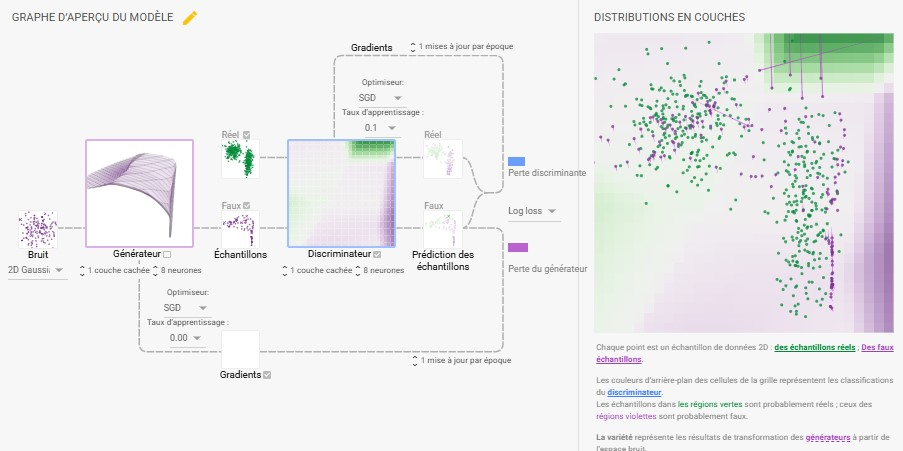

**Observations :**


Les points générés (violets) se rapprochent modérément de la vraie distribution (verte).

Les gradients sont moyennement longs → apprentissage normal.

La frontière de décision (fond vert/violet) est assez propre, bien répartie.

Quelques faux échantillons se perdent encore dans les zones violettes, signe d’un apprentissage partiel.

**Commentaire :**

Ce ratio est équilibré mais pas optimal :

Le générateur progresse mais pas suffisamment vite.

Le discriminateur reste correct, mais il n’est pas vraiment “challengé”.

Globalement, l’entraînement est stable mais lent, sans problème majeur.

**Conclusion :**

Ratio équilibré, stable, mais pas spécialement efficace.

**Test 2 — Ratio G2 / D1**

(2 mises à jour générateur pour 1 mise à jour discriminateur)

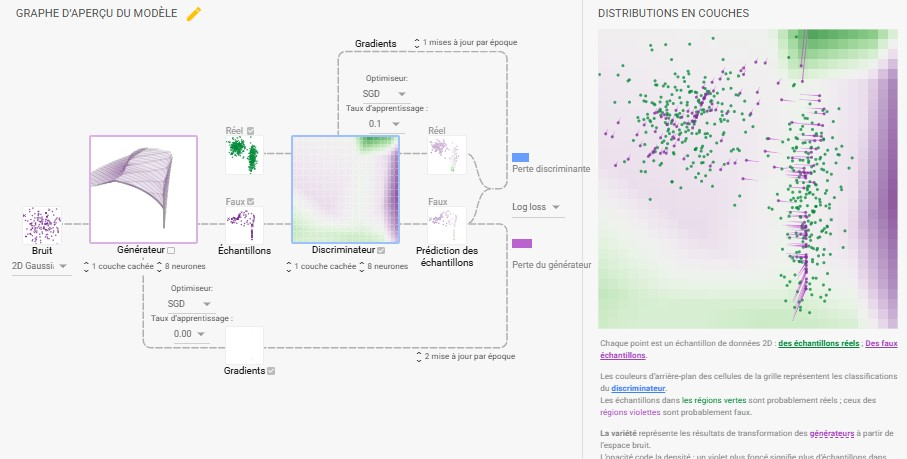

**Observations :**

Les vecteurs violets sont très longs : G apprend plus vite et “force” son adaptation.

Beaucoup plus d’échantillons générés se déplacent agressivement vers les zones vertes.

La frontière de décision du discriminateur devient moins nette, avec des zones violettes mal définies.

Le générateur montre un comportement instable : certains points convergent, d’autres partent dans des directions incohérentes.

**Commentaire :**

Ici, le générateur reçoit plus de mises à jour que le discriminateur, ce qui provoque :

Un générateur trop agressif → risque de mode collapse.

Un discriminateur qui n’arrive pas à suivre → il devient “faible”.

Le modèle commence à perdre son équilibre :

Le générateur gagne du terrain trop vite et ne suit plus la structure réelle des données.

**Conclusion :**

Ratio déséquilibré, générateur trop puissant → instabilité visible.

## 3. StyleGAN3
### 3.1 Instanciation du modèle


In [3]:
import os
os.listdir()


['.ipynb_checkpoints',
 '.kube',
 '0409',
 '07409496-a423-4a3e-b620-2cfb01a9318d_HyperV-ComputeNetwork.dll',
 '69fe178f-26e7-43a9-aa7d-2b616b672dde_eventlogservice.dll',
 '6bea57fb-8dfb-4177-9ae8-42e8b3529933_RuntimeDeviceInstall.dll',
 '@AdvancedKeySettingsNotification.png',
 '@AppHelpToast.png',
 '@AudioToastIcon.png',
 '@BackgroundAccessToastIcon.png',
 '@bitlockertoastimage.png',
 '@edptoastimage.png',
 '@EnrollmentToastIcon.png',
 '@language_notification_icon.png',
 '@optionalfeatures.png',
 '@StorageSenseToastIcon.png',
 '@VpnToastIcon.png',
 '@windows-hello-V4.1.gif',
 '@WindowsHelloFaceToastIcon.png',
 '@WindowsUpdateToastIcon.contrast-black.png',
 '@WindowsUpdateToastIcon.contrast-white.png',
 '@WindowsUpdateToastIcon.png',
 '@WirelessDisplayToast.png',
 '@WLOGO_48x48.png',
 'aadauthhelper.dll',
 'aadcloudap.dll',
 'aadjcsp.dll',
 'aadtb.dll',
 'aadWamExtension.dll',
 'AarSvc.dll',
 'AboutSettingsHandlers.dll',
 'AboveLockAppHost.dll',
 'accessibilitycpl.dll',
 'accountaccesso

In [4]:
import os
os.chdir(r"C:\Users\sanat\Desktop\stylegan3")
os.getcwd()


'C:\\Users\\sanat\\Desktop\\stylegan3'

In [5]:
import sys
sys.path.append(r"C:\Users\sanat\Desktop\stylegan3")


In [15]:
import torch
import legacy
import dnnlib

# URL du modèle StyleGAN3 officiel (FFHQ 1024)
network_url = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-ffhq-1024x1024.pkl"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with dnnlib.util.open_url(network_url) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

print("✔ Modèle StyleGAN3 chargé et instancié")


✔ Modèle StyleGAN3 chargé et instancié


### 3.2. Réalisation de différentes inférences 

Dans cette partie, nous avons chargé le modèle pré-entraîné StyleGAN3-T FFHQ 1024×1024 et nous avons réalisé plusieurs inférences à partir de différents seeds (nombres initiaux).
Pour chaque inférence, nous avons effectué :

un amorçage du générateur aléatoire avec la seed choisie

la génération du vecteur latent z

la synthèse d'une image 1024×1024

l’enregistrement de l’image générée

In [7]:
import numpy as np
from PIL import Image

def generate(seed, save=True):
    print(f"\n---- Inférence avec seed = {seed} ----")

    # Amorçage (obligatoire pour l'énoncé)
    rnd = np.random.RandomState(seed)

    # Vecteur latent
    z = torch.from_numpy(rnd.randn(1, G.z_dim)).to(device)

    # Génération
    img = G(z, None)

    # Conversion en image
    img = (img[0].cpu().numpy().transpose(1, 2, 0) * 127.5 + 128)
    img = img.clip(0, 255).astype(np.uint8)
    img = Image.fromarray(img, "RGB")

    # Sauvegarde
    filename = f"stylegan3_seed_{seed}.png"
    if save:
        img.save(filename)
        print(f"✔ Image enregistrée : {filename}")

    return img


   




---- Inférence avec seed = 10 ----
✔ Image enregistrée : stylegan3_seed_10.png


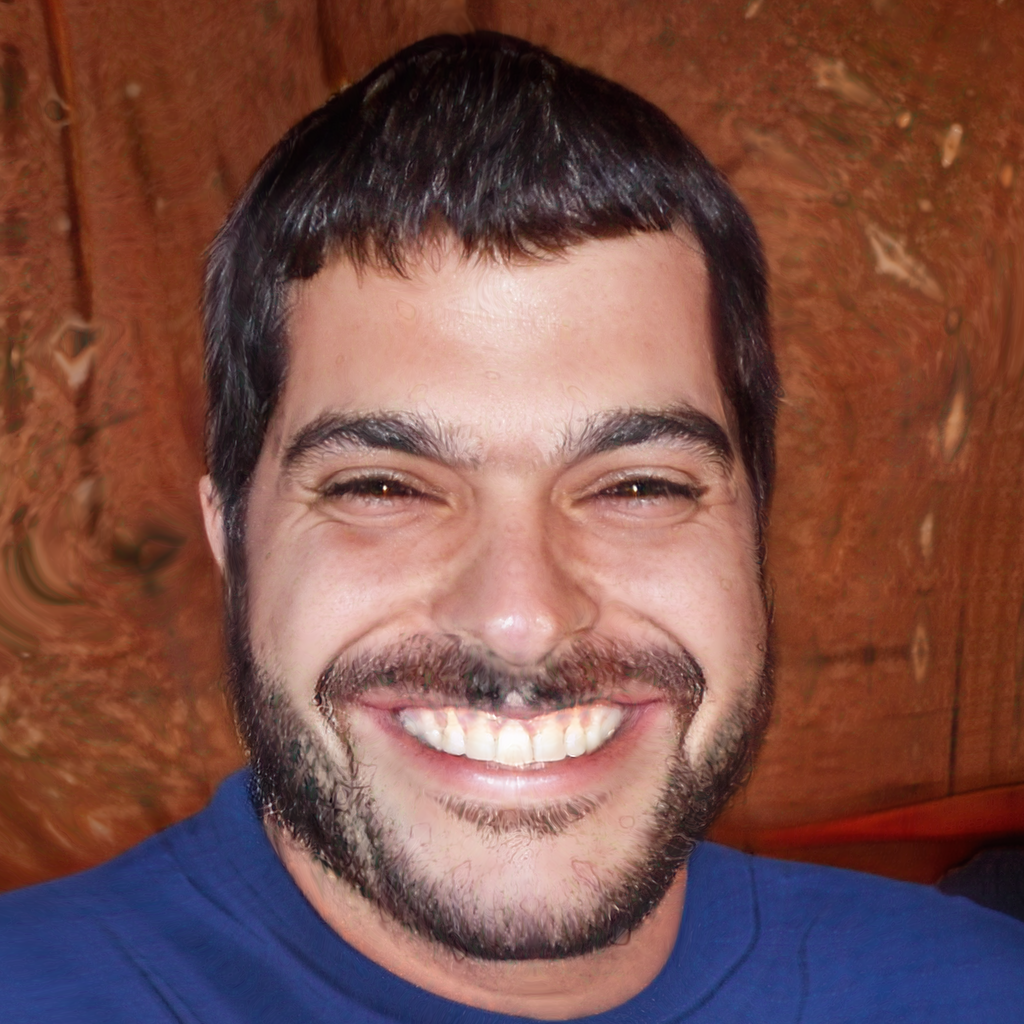

In [8]:
img1 = generate(10)
img1


**Inférence 1 — Seed = 10**

**Amorçage du générateur:**

Le générateur a été initialisé avec la seed 10, ce qui fixe l’état du générateur pseudo-aléatoire.
Cela garantit que la génération est reproductible : une même seed produit toujours la même image.

**Image générée:**

L’image obtenue correspond à un visage réaliste, avec des traits cohérents (peau, proportions du visage, éclairage).
Comme le modèle FFHQ est entraîné sur des portraits, l’image représente un visage humain artificiel, mais photoréaliste.


---- Inférence avec seed = 123 ----
✔ Image enregistrée : stylegan3_seed_123.png


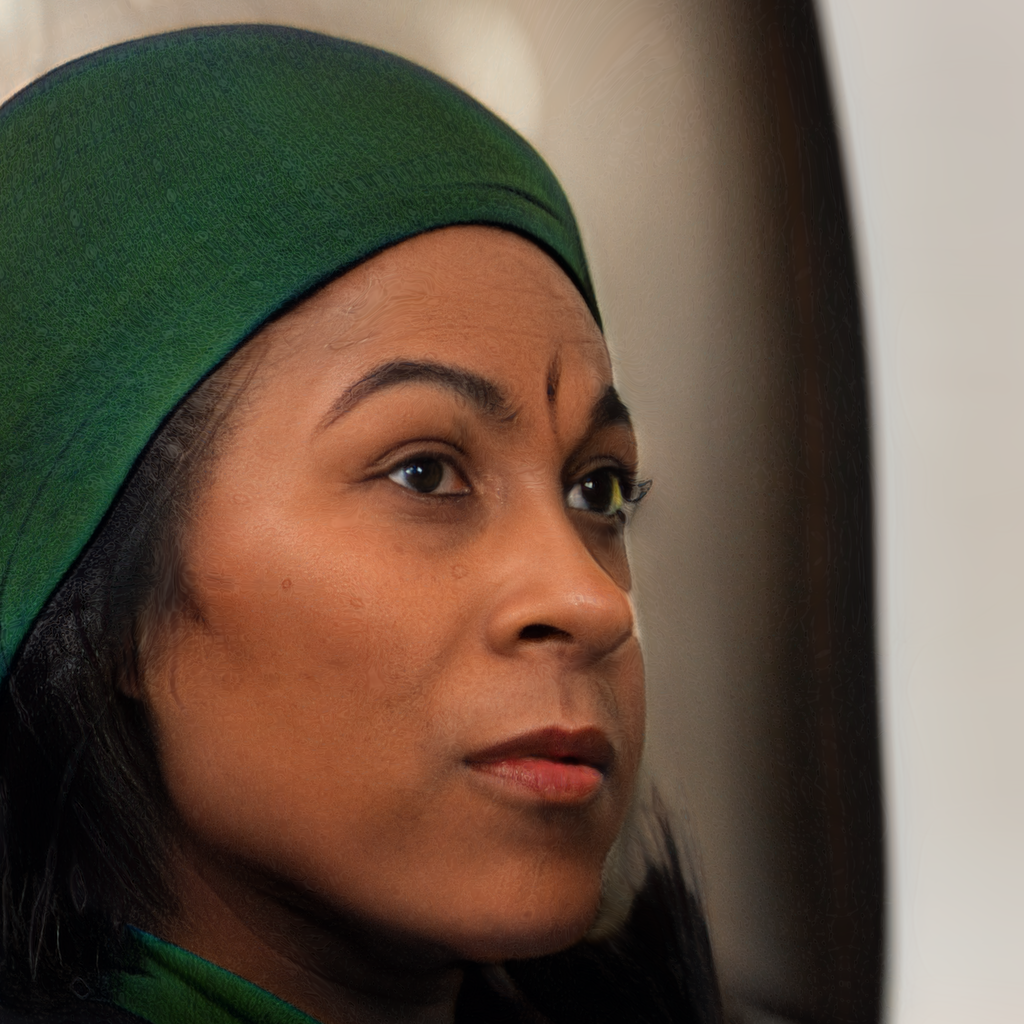

In [9]:
img2 = generate(123)
img2


**Inférence 2 — Seed = 123**

**Amorçage du générateur:**

La seed 123 produit un vecteur latent complètement différent, ce qui entraîne une image sans rapport avec celle obtenue avec la seed 10.

**Image générée:**

L’image montre un autre visage réaliste, illustrant comment StyleGAN3 explore différentes régions de l’espace latent.
Les variations observées portent sur :

la forme du visage

les cheveux

la posture

l’expression

l’éclairage


---- Inférence avec seed = 2025 ----
✔ Image enregistrée : stylegan3_seed_2025.png


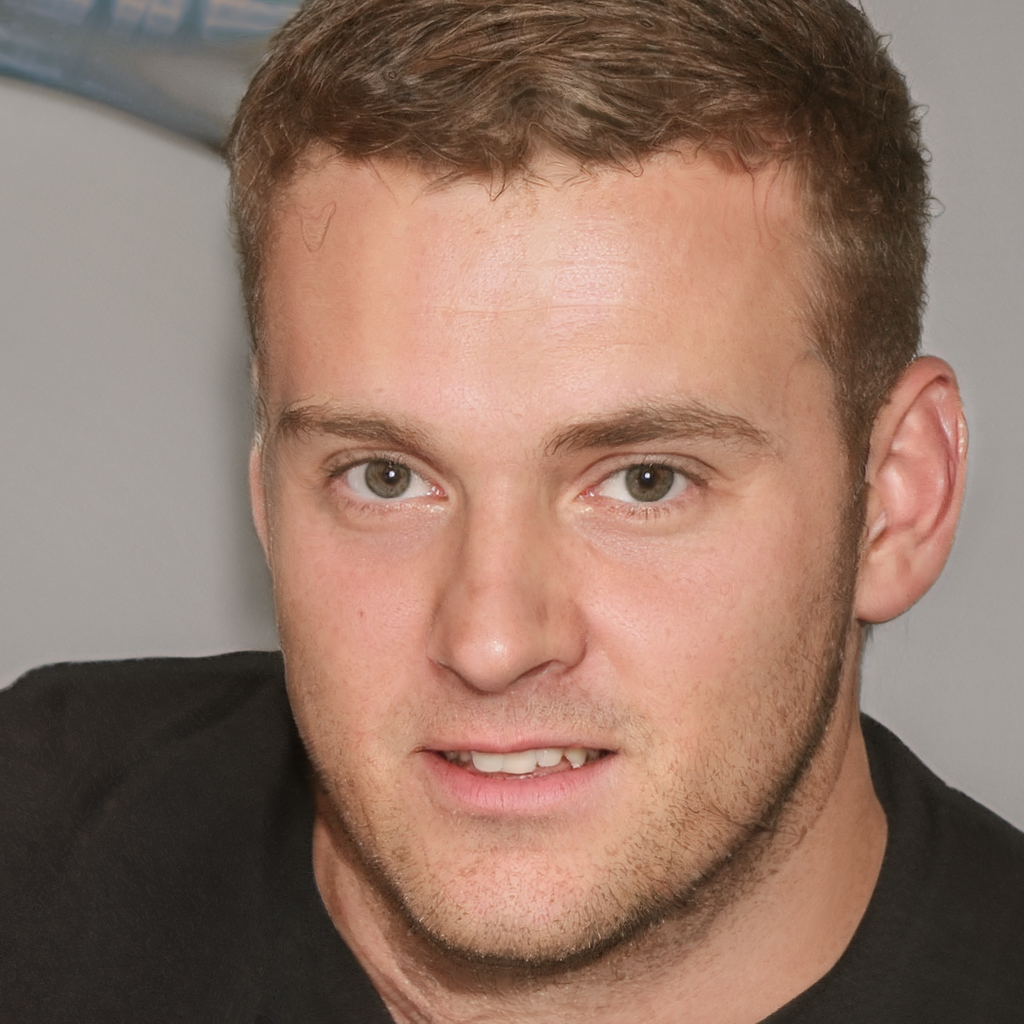

In [10]:
img3 = generate(2025)
img3


**Inférence 3 — Seed = 2025**

**Amorçage du générateur:**

La seed 2025 génère un troisième vecteur latent, permettant d’explorer une autre zone de l’espace latent de StyleGAN3.

**Image générée**

Comme précédemment, le modèle génère un portrait photoréaliste mais unique.
Cette image illustre clairement que StyleGAN3 est capable de produire une très grande diversité de visages plausibles à partir d’un simple vecteur latent.

**Conclusion globale (StyleGAN3)**

Les trois inférences montrent que :

L’utilisation d’une seed permet de contrôler la génération et d’assurer la reproductibilité.

Le modèle StyleGAN3 produit des images haute qualité, très réalistes, même sans entraînement supplémentaire.

Les variations entre seeds montrent l’exploration de l’espace latent :
chaque seed représente un point différent dans cet espace, d’où des visages totalement distincts.

## 4.Conclusion

Ce travail nous a permis d’explorer en profondeur le fonctionnement des réseaux antagonistes génératifs et de comprendre les mécanismes fondamentaux qui régissent leur apprentissage. À travers GAN Lab, nous avons observé de manière visuelle et dynamique l’évolution du générateur et du discriminateur, ainsi que l’impact direct des hyperparamètres sur la stabilité ou l’instabilité de l’entraînement. Ces expériences ont mis en évidence l’importance d’un équilibre précis entre les deux réseaux : un discriminateur trop puissant ou un générateur trop rapide suffit à faire basculer le modèle dans des comportements chaotiques tels que le mode collapse.

L’expérimentation avec StyleGAN3 a illustré la maturité atteinte par les modèles génératifs modernes. L’instanciation du modèle et la réalisation d’inférences à partir de seeds différentes ont révélé la richesse et la cohérence de l’espace latent, ainsi que la capacité du réseau à produire des images photoréalistes d’une grande diversité. Ces résultats démontrent l’efficacité des architectures de nouvelle génération et confirment l’importance des travaux de recherche actuels sur les GAN.

En somme, ce TD nous a permis d’acquérir une compréhension concrète et approfondie des GAN, depuis les concepts fondamentaux jusqu’à l’utilisation de modèles avancés. Il met en évidence la puissance des approches génératives modernes tout en soulignant les défis liés à leur entraînement. Cette exploration constitue une base solide pour aborder des problématiques plus complexes en apprentissage profond et ouvre la porte à de nombreux usages pratiques et applications créatives des réseaux génératifs.